In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression


# Making dataset for LogReg

In [3]:
datasetFull = pd.read_csv('documentFromPandasTemp.csv')

In [611]:
datasetFull[datasetFull['title']=="В Поисках Четырёхлистного Красного Клевера!"]['Personaji'].to_list()

['Сакура Харуно, Какаши Хатаке, Конохамару Сарутоби, Саске Учиха, Наруто Узумаки, Каэде Йошино ']

In [4]:
datasetFull.columns

Index(['Unnamed: 0', 'link', 'title', 'maincontent', 'Tom', 'Predydusaa_glava',
       'Glava', 'Anime', 'Personaji', 'Tehniki', 'Manga', 'Igra',
       'Pol_zovateli', 'Poavlenia', 'Klassifikazia', 'Klass', 'Dal_nost_',
       'Osnovnoe', 'Proizvodnoe', 'Element', 'Predydusij_epizod', 'Informazia',
       'Arka', 'Muzyka', 'Aponskaa', 'Gruppa', 'Nomer_Endinga',
       'Nacal_nyj_Epizod', 'Navigazia', 'Nomer_Openinga', 'Konecnyj_Epizod',
       'Fil_m', 'Novella', 'Platforma', 'Data', 'Predydusaa_igra', 'Dzuzu',
       'Snarajenie', 'Seria', 'Sleduusij_epizod', 'Prisposoblenia', 'Aponskij',
       'Data_rojdenia', 'Pol', 'Prinadlejnost_', 'Komanda', 'Rang',
       'Poavlenie', 'Anglijskij', 'Rost', 'Professia', 'Partnery', 'OVA',
       'Vozrast', 'Status', 'Rangi', 'Unikal_nye', 'Sem_a', 'Klan',
       'Anglijskaa', 'Vid', 'Raspolojenie', 'Lidery', 'Sovmestnye',
       'Sleduusaa_glava', 'Komandy', 'Izvestnye', 'Lider', 'Dannye',
       'Predydusij_tom', 'Sleduusij_tom', 'Svedenia', '

# Создание точного списка персонажей, чтобы расставить метки о классе Персонаж/Не Персонаж

In [5]:
# <div class = category-page__members>
list_of_pages = ["https://naruto.fandom.com/ru/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%9F%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%B6%D0%B8",
                  "https://naruto.fandom.com/ru/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%9F%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%B6%D0%B8?from=%D0%9A%D0%B0%D0%BA%D0%BE%D0%B8",
                  "https://naruto.fandom.com/ru/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%9F%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%B6%D0%B8?from=%D0%9C%D0%B0%D0%BD%D0%B0%D0%B1%D1%83+%D0%90%D0%BA%D0%B0%D0%B4%D0%BE",
                  "https://naruto.fandom.com/ru/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%9F%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%B6%D0%B8?from=%D0%9F%D0%BE%D1%81%D1%8B%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F+%D0%AF%D1%89%D0%B5%D1%80%D0%B8%D1%86%D0%B0",
                  "https://naruto.fandom.com/ru/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%9F%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%B6%D0%B8?from=%D0%A2%D0%B5%D0%BC%D1%83%D0%B4%D0%B6%D0%B8%D0%BD",
                  "https://naruto.fandom.com/ru/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%9F%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%B6%D0%B8?from=%D0%A6%D1%83%D0%BA%D0%B0%D0%B4%D0%BE"]
titleofPages = set()
for i in list_of_pages:
    source = requests.get(i)
    soup = BeautifulSoup(source.content)
    div = soup.select("div.category-page__members")[0]
    for a in div.findAll('a', recursive=True):
        if(len(a.text.replace('\n', ''))!=0):
            titleofPages.add(a.text)


In [6]:
titleofPages

{'Канкуро',
 'Монджу',
 'Сатоо',
 'Яширо Учиха',
 'Маэн Нара',
 'Угаи',
 'Суйко',
 'Гари',
 'Микото Учиха',
 'Менма Узумаки',
 'Тонтон',
 'Коненмару',
 'Куроцучи',
 'Тецуру',
 'Ямаока',
 'Глава Деревни Тоника',
 'Мицуки',
 'Комачи',
 'Капитан Корабля-Призрака',
 'Ооноки',
 'Ханаби Хьюга',
 'Хоки Такэтори',
 'Я',
 'Тенма Кодон',
 'Накуби Шин',
 'Раймэй',
 'Масако',
 'Таёри Курояги',
 'Амадо Санзу',
 'Сабу',
 'Шимейдзи',
 'Потча',
 'Кири (ниндзя)',
 'Хохето Хьюга',
 'Кьёхо Фуэфуки',
 'Манда 2',
 'Булл',
 'Ку',
 'Харуна',
 'Хокушин',
 'Ятого Рьюген',
 'Тамао',
 'Шисеру',
 'Неджи Хьюга',
 'Фуки (Отогакуре)',
 'Аккун',
 'Химуши',
 'Аники (отступник)',
 'Цубуте Футаба',
 'Бунпуку',
 'Кейри',
 'Тосака',
 'Акио',
 'Каори',
 'Мабуи',
 'Тофу',
 'Бенга',
 'Третий Казекаге',
 'Первый Путь Зверя (персонаж)',
 'Сора',
 'Хамура Ооцуцуки',
 'Рьюзецу',
 'Кииро',
 'Гаруда',
 'Нитора Таке',
 'Хайе',
 'Хеки',
 'Ханзаки',
 'Гантецу',
 'Шишио',
 'Наори Учиха',
 'Шуу',
 'Чиби',
 'Староста Деревни',
 'Шин Учи

# Расставление меток

In [7]:
datasetFull['Персонаж'] = np.where(datasetFull['title'].isin(titleofPages), 1, 0)

In [8]:
datasetFull[datasetFull['Персонаж']==1]

,Unnamed: 0,link,title,maincontent,Tom,Predydusaa_glava,Glava,Anime,Personaji,Tehniki,...,Dannye,Predydusij_tom,Sleduusij_tom,Svedenia,Translazii,Orujie,Svazannye,Statistika,id,Персонаж
148,148,https://naruto.fandom.com/ru/wiki/%D0%81%D0%BA...,Ёкодзуна,"Ёкодзуна (яп.ヨコズナ,Ёкодзуна) – лидер Борцов Сум...",None,None,None,"Наруто: Шиппууден, Эпизод 281",None,None,...,None,None,None,None,None,None,None,None,148,1
150,150,https://naruto.fandom.com/ru/wiki/%D0%81%D0%BC...,Ёмэ,"Ёмэ (яп.ヨメ, Йомэ) — куноичи из Деревни Скрытог...",None,None,None,"Наруто: Шиппууден, Эпизод 395",None,"Техника Уклонения, Техника Мистической Ладони,...",...,None,None,None,None,None,None,None,None,150,1
151,151,https://naruto.fandom.com/ru/wiki/%D0%81%D0%BE...,Ёороо,"Ёороо (яп.ヨウロウ, Йоороо) – джоунин из Скрытого ...",None,None,None,"Наруто: Шиппууден, Эпизод 395",None,Техника Теневого Клонирования Сюрикена,...,None,None,None,None,None,None,None,None,151,1
153,153,https://naruto.fandom.com/ru/wiki/%D0%81%D1%80...,Ёрой Акадо,"Ёрой Акадо (яп.赤胴ヨロイ, Акадоо Йорой) —шинобиДер...",None,None,None,"Наруто, Эпизод 26",None,"Демоническая Иллюзия: Техника Нисходящего Ада,...",...,None,None,None,None,None,None,None,None,153,1
154,154,https://naruto.fandom.com/ru/wiki/%D0%81%D1%80...,Ёруга,"Ёруга (яп.ヨルガ, Ёруга) был шиноби из Страны Ды...",None,None,None,"Боруто, Эпизод 160",None,Искусство Ниндзя Дыма: Запретная Техника: Врат...,...,None,None,None,None,None,None,None,None,154,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2673,https://naruto.fandom.com/ru/wiki/%D0%AF%D0%BE...,Яоки,"Яоки (яп.ヤオキ, Яоки) — шиноби из Скрытого Листа...",None,None,None,"Наруто: Шиппууден, Эпизод 182",None,Техника Марионетки,...,None,None,None,None,None,None,None,None,2673,1
2683,2683,https://naruto.fandom.com/ru/wiki/%D0%AF%D1%82...,Ятого Рьюген,"Ятого Рьюген (яп.りゅうげんヤトゴ,Рьюген Ятого) — чуун...",None,None,None,"Наруто: Шиппууден, Эпизод 335",None,None,...,None,None,None,None,None,None,None,None,2683,1
2684,2684,https://naruto.fandom.com/ru/wiki/%D0%AF%D1%85...,Яхико,"Яхико(яп.弥彦, Яхико) был шиноби из Деревни Скры...",None,None,None,"Наруто: Шиппууден, Эпизод 128",None,"Стихия Воды: Неукротимая Водяная Волна, Стихия...",...,None,None,None,None,None,None,None,None,2684,1
2685,2685,https://naruto.fandom.com/ru/wiki/%D0%AF%D1%88...,Яшамару,"Яшамару (яп.夜叉丸, Ящамару) был Анбу из Деревни ...",None,None,None,"Наруто, Эпизод 50",None,"Управляемые Атакующие Клинки, Небесная Кара",...,None,None,None,None,None,None,None,None,2685,1


# Удаление оставшихся тегов

In [9]:
datasetFull['maincontent'] = datasetFull['maincontent'].replace(['\xad', '\u3000'], '')

In [24]:
datasetFull['maincontent']

0       "Война" Омои!! (яп.オモイの｢戦争｣!!, Омои но Сэнсоу!...
1       Мать (яп.母, Хаха) и Отец (яп.父, Чичи) — первые...
2                                                     NaN
3       100% Удар (яп.100％シングルパンチ, 100-Паасенто Щингур...
4       100-метровый Удар (яп.100mパンチ, 100 Панчи) — ос...
                              ...                        
2683    Ятого Рьюген (яп.りゅうげんヤトゴ,Рьюген Ятого) — чуун...
2684    Яхико(яп.弥彦, Яхико) был шиноби из Деревни Скры...
2685    Яшамару (яп.夜叉丸, Ящамару) был Анбу из Деревни ...
2686    Яширо Учиха (яп.八代サスケ, Учиха Яширо) был членом...
2687    Марионетка S-ранга, используемаяИбуши. Она пох...
Name: maincontent, Length: 2688, dtype: object

# Сборка тренировочной выборки

In [10]:
train_dataset = datasetFull[datasetFull['Персонаж']==1]

In [11]:
train_dataset = train_dataset.append(datasetFull[datasetFull['Персонаж']==0].iloc[:515])

# Перемешиваем выборку и выбираем только исследуемые поля

In [12]:
from sklearn.utils import shuffle

In [13]:
train_dataset = shuffle(train_dataset)

In [14]:
train_dataset = train_dataset[['title', 'maincontent', 'Персонаж']].copy()

In [15]:
train_dataset = train_dataset.reset_index()

In [16]:
train_dataset

,index,title,maincontent,Персонаж
0,336,Бабуля Чиё и Сакура (Том),"Бабуля Чиё и Сакура (яп.チヨバアとサクラ, Чиё-Баа то С...",0
1,311,Асума Сарутоби,"Асума Сарутоби (яп.猿飛 アスマ, Сарутоби Асума) был...",1
2,142,Yellow Moon,Yellow Moon — тринадцатый эндинг к аниме Нарут...,0
3,1849,Канкуро,"Канкуро (яп.カンクロウ, Канкуроо) ― шиноби из Скрыт...",1
4,177,Акабоши,"Акабоши (яп.アカボシ, Акабощи) — член Группировки ...",1
...,...,...,...,...
1025,143,Yokubō o Sakebe!!!,"Yokubō o Sakebe!!! (яп.欲望を叫べ!!!, Ёкубоо о Сакэ...",0
1026,468,Божество: Рождение Древесного Мира,"Божество: Рождение Мира Деревьев(яп.神・樹界降誕, Щи...",0
1027,584,Великий Песчаный Ливень,"Гаара, летя на своем песке, манипулирует им, ч...",0
1028,2469,Шибито Азума,"Шибито Азума (яп.東シビト, Азума Шибито) был джоун...",1


# Дальше идёт подбор результатов, чтобы объекты вероятностью >0.6 являлись персонажи

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Лавандос\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words('russian')

In [18]:
i = train_dataset[train_dataset['title']=='-'].index
train_dataset = train_dataset.drop(i)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_word = TfidfVectorizer(max_features = 40000,lowercase=True, analyzer='word',
                        stop_words= russian_stopwords,ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer(max_features = 80000, lowercase=True, analyzer='char',
                        stop_words= russian_stopwords,ngram_range=(3,6),dtype=np.float32)

In [20]:
from sklearn.model_selection import train_test_split
train = train_dataset[train_dataset['Персонаж']==0].iloc[:400]
train = train.append(train_dataset[train_dataset['Персонаж']==1].iloc[:200])
train = shuffle(train)
x_train, x_test = train_test_split(train, test_size=0.3)

In [21]:
x_test[x_test['Персонаж'] ==1 ]['title'].count()

63

In [22]:
x_train.shape

(420, 4)

In [23]:
tr_vect = vect_word.fit_transform(x_train['maincontent'])
ts_vect = vect_word.transform(x_test['maincontent'])
tr_vect_char = vect_char.fit_transform(x_train['maincontent'])
ts_vect_char = vect_char.transform(x_test['maincontent'])

In [24]:
from scipy import sparse
X = sparse.hstack([tr_vect, tr_vect_char])
x_x_test = sparse.hstack([ts_vect, ts_vect_char])
y = x_train[['Персонаж']]
lr = LogisticRegression( C=10)
lr.fit(X, y)


c:\Users\Лавандос\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10)

In [25]:
lr.classes_

array([0, 1])

In [26]:
submission = pd.DataFrame.from_dict({'title': x_test['title'], 'true_mark':x_test['Персонаж']})

In [27]:
submission['Персонаж'] = lr.predict_proba(x_x_test)[:, 1]

# Сбор сливок с прогона тестовой выборки

In [28]:
submission[submission['Персонаж'] > 0.8].count()

title        30
true_mark    30
Персонаж     30
dtype: int64

In [29]:
submission[submission['Персонаж'] > 0.8]

,title,true_mark,Персонаж
47,Каното,1,0.861361
217,Кисуке Мабороши,1,0.934533
137,Гатаро,1,0.926424
274,Миджин,1,0.880979
19,Гари,1,0.865199
113,Майто Гай,1,0.860185
282,Эф,1,0.802210
456,Ёрои Акадо,0,0.819973
350,Асаки,1,0.877558
49,Гонбэе,1,0.900501


Column: Персонаж


Text(0.5, 1.0, 'Reciever Operating Characteristic')

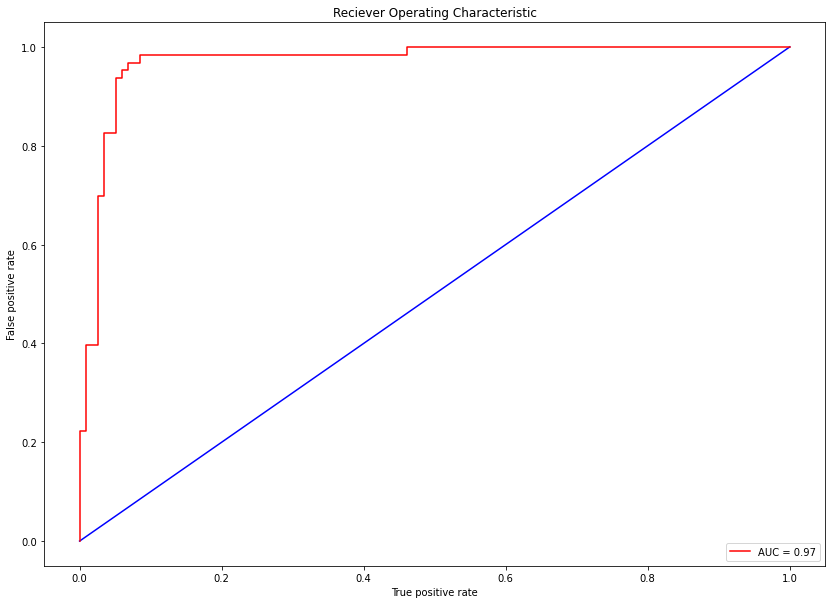

In [30]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
col = 'Персонаж'
print("Column:",col)
pred_pro = lr.predict_proba(x_x_test)[:,1]
frp,trp,thres = roc_curve(x_test['Персонаж'],pred_pro)
auc_val =auc(frp,trp)
plt.figure(figsize=(14,10))
plt.plot([0,1],[0,1],color='b')
plt.plot(frp,trp,color='r',label= 'AUC = %.2f'%auc_val)
plt.legend(loc='lower right')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Reciever Operating Characteristic')

# Теперь используем модель для разметки документов

In [548]:
dataset_to_proceed = datasetFull.copy()
dataset_to_proceed = dataset_to_proceed[['title', 'maincontent']].copy()


In [549]:
i = dataset_to_proceed[dataset_to_proceed['title']=='-'].index
dataset_to_proceed = dataset_to_proceed.drop(i)

In [550]:
vect_word = TfidfVectorizer(max_features = 40000,lowercase=True, analyzer='word',
                        stop_words= russian_stopwords,ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer(max_features = 80000, lowercase=True, analyzer='char',
                        stop_words= russian_stopwords,ngram_range=(3,6),dtype=np.float32)

In [572]:
vect = vect_word.transform(dataset_to_proceed['maincontent'])
vect_c = vect_char.transform(dataset_to_proceed['maincontent'])
data = sparse.hstack([vect, vect_c])
probas = lr.predict_proba(data)[:, 1]
submission = pd.DataFrame.from_dict({'title': dataset_to_proceed['title'], 'Personaji':probas})

In [578]:
submission[submission['Personaji']>0.8]

,title,Personaji
147,Ёказе,1
148,Ёкодзуна,1
150,Ёмэ,1
151,Ёороо,1
154,Ёруга,1
...,...,...
2670,Ямаока,1
2671,Ямато,1
2673,Яоки,1
2684,Яхико,1


In [576]:
submission[submission['Personaji']>0.9]

,title,Personaji
147,Ёказе,0.921956
150,Ёмэ,0.947031
151,Ёороо,0.954249
154,Ёруга,0.923259
155,Ёта,0.938068
...,...,...
2665,Якку,0.968286
2667,Якумо Курама,0.901826
2670,Ямаока,0.919325
2671,Ямато,0.953479


In [577]:
submission['Personaji'] = np.where(submission['Personaji']>0.8, 1, 0)
submission

,title,Personaji
0,"""Война"" Омои!!",0
1,"""Мать"" и ""Отец""",0
3,100% Удар,0
4,100-метровый Удар,0
5,1000-метровый Удар,0
...,...,...
2683,Ятого Рьюген,0
2684,Яхико,1
2685,Яшамару,1
2686,Яширо Учиха,0


In [614]:
datasetFull['Personaji'] = np.where((submission['title'] == datasetFull['title']) & (submission['Personaji'] == 1), submission['title'], datasetFull['Personaji'])

In [612]:
i = datasetFull[datasetFull['title']=='-'].index
datasetFull = datasetFull.drop(i)

In [604]:
datasetFull[datasetFull['Personaji']=="Наруто"]

,link,title,maincontent,Tom,Predydusaa_glava,Glava,Anime,Personaji,Tehniki,Manga,...,Lider,Dannye,Predydusij_tom,Sleduusij_tom,Svedenia,Translazii,Orujie,Svazannye,Statistika,id


In [588]:
del datasetFull['Персонаж']

In [613]:
del datasetFull['Unnamed: 0']

In [595]:
with open('tfidf.json', 'w', encoding='utf-8') as file:
    datasetFull.to_json(file, force_ascii=False, orient='records')

In [615]:
datasetFull.to_csv('tfidfCSV.csv')